In [ ]:
"""Following codes are originally from 
https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184;
https://gist.github.com/n0acar/5a75dbfec2f0836426a7997296d6d19e#file-image_visualisation-py with modifications"""

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image #python imaging library

In [ ]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col, channel):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.get_cmap(channel))
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("/content/drive/MyDrive/CS_3220_Final_Project/Code/")

['processor.ipynb',
 'lfwcrop_grey',
 'lfwcrop_color',
 'k-means-example.ipynb',
 'eigenfaces.ipynb',
 'eigenfaces_color.ipynb',
 '100 of eigenfaces_colorrgbseparated.ipynb',
 '300 of eigenfaces_colorrgbseparated.ipynb',
 '150 of 100 of eigenfaces_colorrgbseparated.ipynb',
 '200 of eigenfaces_colorrgbseparated.ipynb',
 'Copy of eigenfaces_colorrgbseparated.ipynb',
 'eigenfaces_colorrgbseparated.ipynb']

In [ ]:
dir = '/content/drive/MyDrive/CS_3220_Final_Project/Code/lfwcrop_color/faces'
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
#images=np.array([np.asarray(Image.open(image)) for image in celebrity_images], dtype=np.float64)
images = []
for i in range(len(celebrity_images)):
  images.append(np.asarray(Image.open(celebrity_images[i])))

In [ ]:
def split23(images):
  rset = []
  gset = []
  bset = []
  for i in range(len(images)):
    im = Image.Image.split(Image.open(celebrity_images[i]))
    rset.append(np.asarray(im[0]))
    gset.append(np.asarray(im[1]))
    bset.append(np.asarray(im[2]))
  return rset, gset, bset
rset, gset, bset = split23(images)

In [ ]:
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]

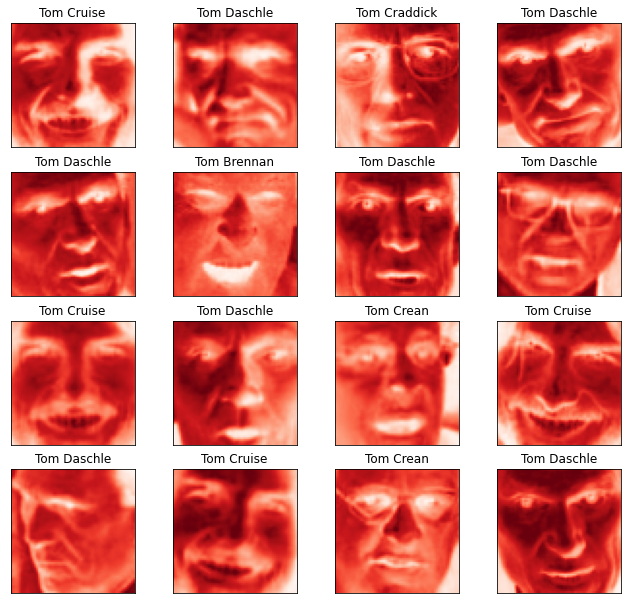

In [ ]:
h,w = gset[0].shape
plot_portraits(rset, celebrity_names, h, w, n_row=4, n_col=4, channel = "Reds")


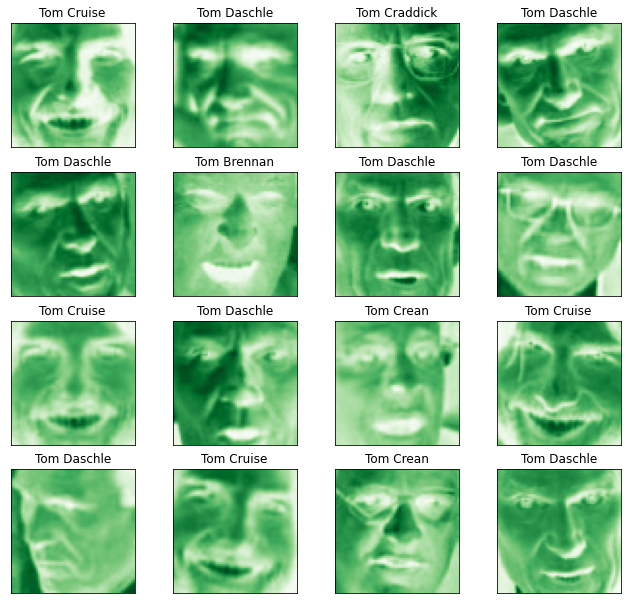

In [ ]:
plot_portraits(gset, celebrity_names, h, w, n_row=4, n_col=4,channel= "Greens")

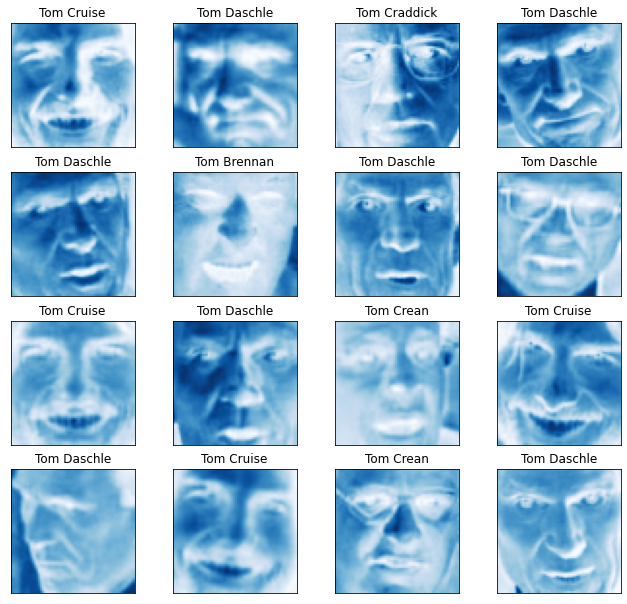

In [ ]:
plot_portraits(bset, celebrity_names, h, w, n_row=4, n_col=4,channel= "Blues")

In [ ]:
n_samples = len(images)

In [ ]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    return projected, components, mean, centered_data

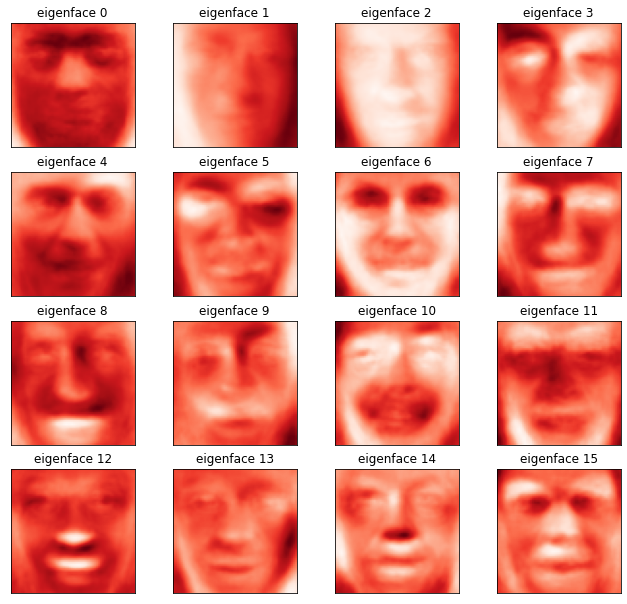

In [ ]:
n_components = 50
arrimages = np.array(rset)
X = arrimages.reshape(n_samples, h*w)
rP, rC, rM, rY= pca(X, n_pc=n_components)
reigenfaces = rC.reshape((n_components, h, w))
reigenface_titles = ["eigenface %d" % i for i in range(reigenfaces.shape[0])]
plot_portraits(reigenfaces, reigenface_titles, h, w, 4, 4,channel="Reds") 

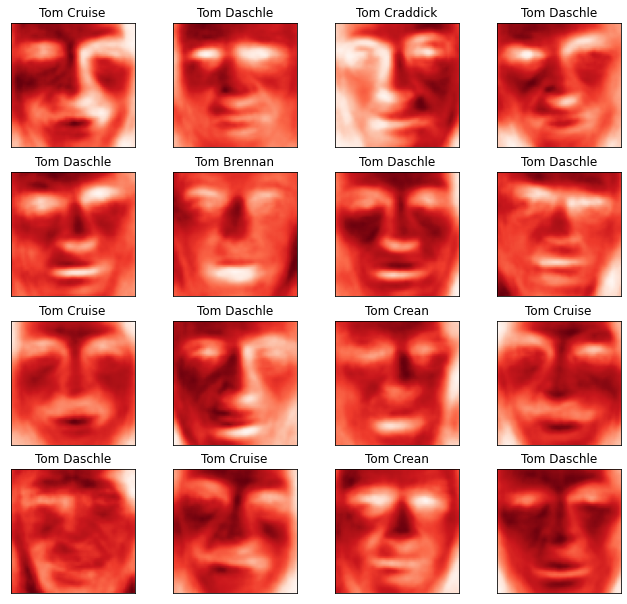

In [ ]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
rrecovered_images=[reconstruction(rY, rC, rM, h, w, i) for i in range(len(images))]
plot_portraits(rrecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Reds")

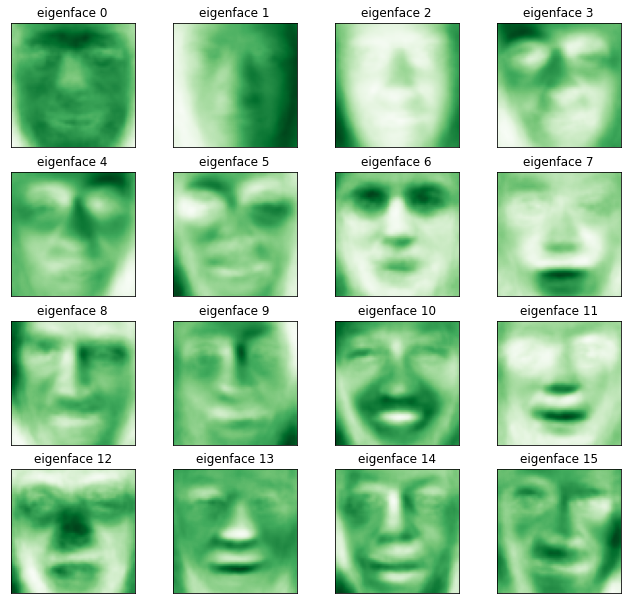

In [ ]:
n_components = 50
arrimages = np.array(gset)
X = arrimages.reshape(n_samples, h*w)
gP, gC, gM, gY= pca(X, n_pc=n_components)
geigenfaces = gC.reshape((n_components, h, w))
geigenface_titles = ["eigenface %d" % i for i in range(geigenfaces.shape[0])]
plot_portraits(geigenfaces, geigenface_titles, h, w, 4, 4,channel="Greens") 

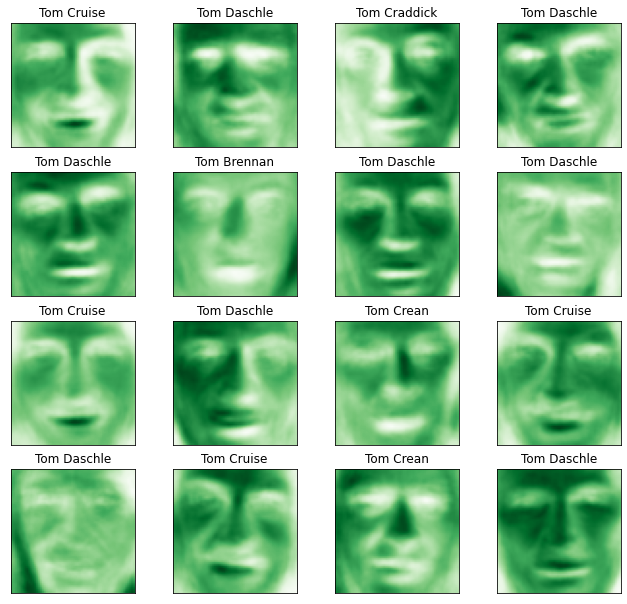

In [ ]:
grecovered_images=[reconstruction(gY, gC, gM, h, w, i) for i in range(len(images))]
plot_portraits(grecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Greens")

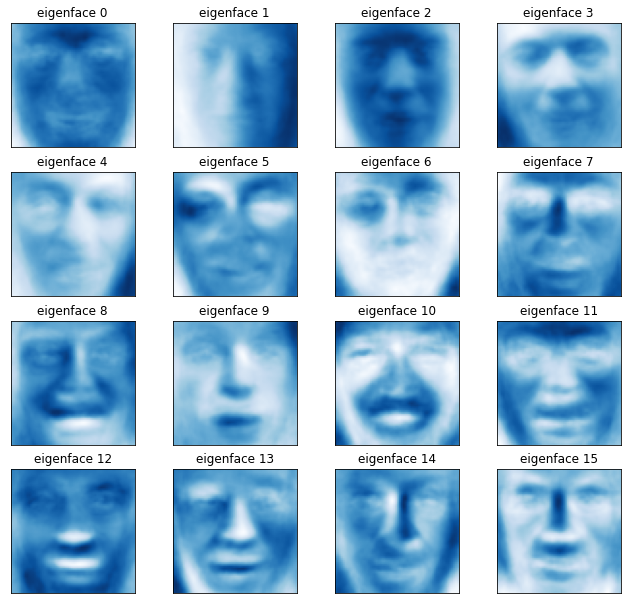

In [ ]:
n_components = 50
arrimages = np.array(bset)
X = arrimages.reshape(n_samples, h*w)
bP, bC, bM, bY= pca(X, n_pc=n_components)
beigenfaces = bC.reshape((n_components, h, w))
beigenface_titles = ["eigenface %d" % i for i in range(beigenfaces.shape[0])]
plot_portraits(beigenfaces, beigenface_titles, h, w, 4, 4,channel="Blues") 

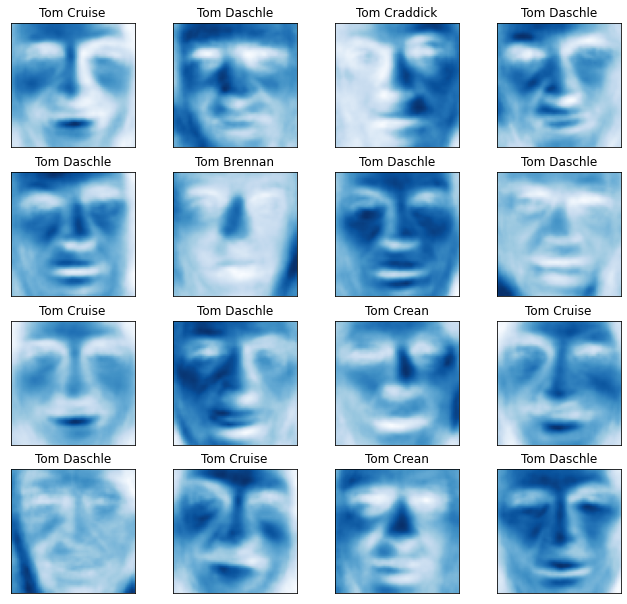

In [ ]:
brecovered_images=[reconstruction(bY, bC, bM, h, w, i) for i in range(len(images))]
plot_portraits(brecovered_images, celebrity_names, h, w, n_row=4, n_col=4, channel="Blues")

[128.698 134.479 140.584 ... 113.655 111.359 109.486] [101.097 104.708 108.618 ...  91.38   90.165  89.528] [79.5   81.807 84.665 ... 76.627 76.3   76.411]


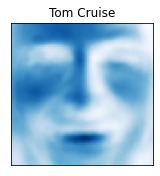

In [ ]:
print(rM,gM,bM)
plot_portraits([brecovered_images[0]], [celebrity_names[0]], h, w, n_row=1, n_col=1, channel="Blues")

In [ ]:
justr = np.asarray(rrecovered_images).reshape(len(rrecovered_images)*h*w)
justg = np.asarray(grecovered_images).reshape(len(grecovered_images)*h*w)
justb = np.asarray(brecovered_images).reshape(len(brecovered_images)*h*w)

minr = min(justr)
ming = min(justg)
minb = min(justb)

scalr = 255/(max(justr) - minr)
scalg = 255/(max(justg) - ming)
scalb = 255/(max(justb) - minb)



def recon(im1, im2, im3):
  reconIm = []
  for i in range(len(im1)):
    temp1 = []
    for j in range(len(im1[0])):
      temp2 = [int(scalr*(im1[i][j]-minr)), int(scalg*(im2[i][j]-ming)), int(scalb*(im3[i][j]-minb))]
      temp1.append(temp2)
    reconIm.append(temp1)
  return reconIm
def recon_and_set(im1, im2, im3):
  reconIm = []
  reconr = []
  recong = []
  reconb = []
  for i in range(len(im1)):
    temp1r = []
    temp1g = []
    temp1b = []
    temp1 = []
    for j in range(len(im1[0])):
      temp2r = int(scalr*(im1[i][j]-minr))
      temp2g = int(scalg*(im2[i][j]-ming))
      temp2b = int(scalb*(im3[i][j]-minb))
      temp2 = [temp2r,temp2g,temp2b]
    temp1r.append(temp2r)
    temp1g.append(temp2g)
    temp1r.append(temp2b)
    temp1.append(temp2)
  return reconIm,reconr, recong, reconb

In [ ]:
print(rset[0][0])

[156 163 181 201 213 210 209 209 213 218 219 216 220 225 226 227 228 232
 235 236 236 235 233 231 230 227 222 221 218 219 221 222 220 216 214 213
 212 214 214 215 211 206 200 195 192 187 180 171 164 160 160 162 157 147
 133 105  71  41  27  24  21  16  11   8]


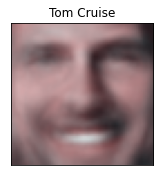

In [ ]:
temp = recon(rrecovered_images[0], grecovered_images[0], grecovered_images[0])
plot_portraits([temp], [celebrity_names[0]], h, w, n_row=1, n_col=1, channel="Blues")

1000


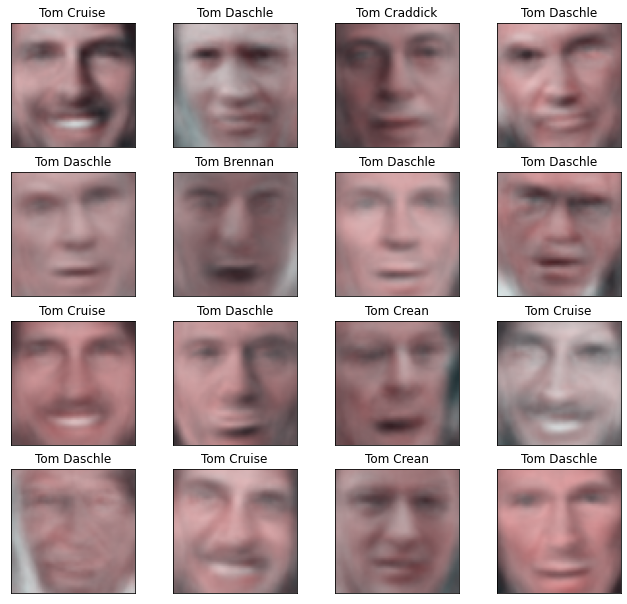

In [ ]:
reconims = []
reconimrs = []
reconimgs = []
reconimbs = []
for i in range(len(rrecovered_images)):
  newreim,newreimr,newreimg,newreimb = recon(rrecovered_images[i], grecovered_images[i], grecovered_images[i])
  reconims.append(newreim)
  reconimrs.append(newreimr)
  reconimgs.append(newreimg)
  reconimbs.append(newreimb)
print(len(reconims))

In [ ]:
def accuracy(original, reconstruction):
    difference = original - reconstruction
    sum = np.sum(np.abs(difference))
    return sum / np.sum(original)

